In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import glob
import matplotlib as mpl
import netCDF4 as nc
from shapely.geometry import Polygon, LineString, Point
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import cartopy.feature as cfeature
import xarray as xr
import geopandas as gpd
import contextily as cx
import h5py

In [2]:
analysis_dataset_path = '/Users/zhu/Dropbox/Code/Publications/RACM2B-VCP-analysis-data/'
datapath = analysis_dataset_path+'surf_map/'
shapefile = gpd.read_file(analysis_dataset_path+"LA_Merge/LA_Merge.shp")

In [3]:
shapefile

,MERGE_SRC,Shape_Leng,Shape_Area,geometry
0,DowntownLA,370512.179099,7.950776e+09,"POLYGON Z ((-118.21949 34.15008 0.00000, -118...."
1,SanBernadinoValley,726897.827213,2.106844e+10,"POLYGON Z ((-117.29887 34.16366 0.00000, -117...."
2,SantaAnaValley,414610.175526,9.979919e+09,"POLYGON Z ((-118.00702 33.92604 0.00000, -118...."
3,CoastLA,597367.161212,1.473018e+10,"POLYGON Z ((-118.42647 34.04532 0.00000, -118...."


In [4]:
arrays = {}
f = h5py.File(datapath + 'vocr_daily_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t2_4km.mat')
for k, v in f.items():
    arrays[k] = np.array(v)
vocr_combs=arrays['vocr_comb']
xloncorn = arrays['xloncorn']
xlatcorn = arrays['xlatcorn']
lon = arrays['lon']
lat = arrays['lat']

fns = ['co','ch4','eth','hc3','hc5','hc8','ete','olt','oli','dien','ace','ben','tol','xyl','xyo','iso','api','lim',
       'hcho','acd','ald','act','mek','ket','hket','macr','mvk','uald','gly','mgly','dcb1','dcb2','dcb3','bald',
       'phen','csl','epx','mct','moh','eoh','roh','eteg','op1','op2','glyc','uhc','d4silx','d5silx','pcbtf','pdcbz',
       'nald','oald','cuald','cald','eclp']

#calibrated VOCr
cal_vocs = ['ch4','moh','eoh','acd','act','iso','macr','mvk','api','lim','eclp','ben','tol',
          'bald','xyl','d5silx','pcbtf']
cal_indx = []
for cal_voc in cal_vocs:
    cal_indx.append(fns.index(cal_voc))

In [5]:
vocr_combs = np.nanmean(vocr_combs, axis=3)

In [6]:
xlim =  [-118.6,-117.1]
ylim = [33.5,34.2] 
indx = (lon >= xlim[0]) & (lon <= xlim[1]) & (lat >= ylim[0]) & (lat <= ylim[1])

vocr_mean = np.nanmean(vocr_combs[indx,:],axis=0)

In [7]:
vocr_mean[cal_indx].sum()/vocr_mean[1:].sum()

0.5852311940563841

/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/446337968.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vocr_lump = pd.Series()


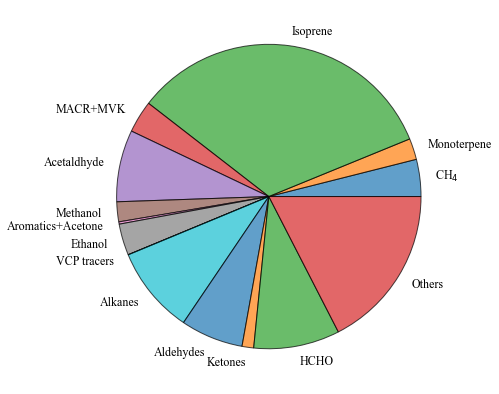

In [8]:

vocr_lump = pd.Series()



vocr_lump['CH$_4$'] =  vocr_mean[fns.index('ch4')]
vocr_lump['Monoterpene'] = vocr_mean[fns.index('api')]+vocr_mean[fns.index('lim')]
vocr_lump['Isoprene'] = vocr_mean[fns.index('iso')]
vocr_lump['MACR+MVK'] = vocr_mean[fns.index('macr')] +vocr_mean[fns.index('mvk')]

vocr_lump['Acetaldhyde'] = vocr_mean[fns.index('acd')]
vocr_lump['Methanol'] = vocr_mean[fns.index('moh')]
vocr_lump['Aromatics+Acetone'] = vocr_mean[fns.index('mek')] + vocr_mean[fns.index('ben')] 
+ vocr_mean[fns.index('tol')] + vocr_mean[fns.index('xyl')]+ vocr_mean[fns.index('csl')]+vocr_mean[fns.index('act')]

#vocr_lump['Acetone'] = vocr_mean[fns.index('act')]
vocr_lump['Ethanol'] = vocr_mean[fns.index('eoh')]

vocr_lump['VCP tracers'] = vocr_mean[fns.index('d5silx')] + vocr_mean[fns.index('pcbtf')] 

#vocr_lump['Alcohol'] = vocr_mean['eoh'] + vocr_mean['moh']
vocr_lump['VCP tracers'] = vocr_mean[fns.index('d4silx')]  + vocr_mean[fns.index('pdcbz')] 

vocr_lump['Alkanes'] = vocr_mean[fns.index('hc3')] + vocr_mean[fns.index('hc5')] + vocr_mean[fns.index('hc8')]
vocr_lump['Aldehydes'] = vocr_mean[fns.index('ald')] 
vocr_lump['Ketones'] = vocr_mean[fns.index('ket')]
vocr_lump['HCHO'] = vocr_mean[fns.index('hcho')]
vocr_lump['Others'] = vocr_mean[1:].sum()-vocr_lump.sum()

plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Times New Roman"

wedges, _ = plt.pie(x=vocr_lump.values, textprops={'fontsize': 12},labels=vocr_lump.index,wedgeprops={"edgecolor":"k",'alpha':0.7})

#p = vocr_lump.plot.pie(cmap='rainbow',fontsize=14,wedgeprops={"edgecolor":"k",'alpha':0.7},colors= colors)
plt.ylabel('')
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('k')
    pie_wedge.set_linewidth(1)


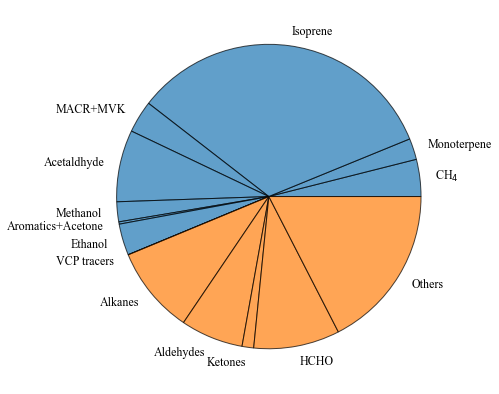

In [9]:
colors = ['tab:blue']*9+['tab:orange']*6

plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Times New Roman"

wedges, _ = plt.pie(x=vocr_lump.values, textprops={'fontsize': 12},labels=vocr_lump.index,wedgeprops={"edgecolor":"k",'alpha':0.7},colors = colors)

#p = vocr_lump.plot.pie(cmap='rainbow',fontsize=14,wedgeprops={"edgecolor":"k",'alpha':0.7},colors= colors)
plt.ylabel('')
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('black')
    pie_wedge.set_linewidth(1)
#plt.savefig('/Users/zhu/Dropbox/Publications/2023-RACM2B_VCP/Figures-v2/cal_to_tot_vocr.pdf', format='pdf')


In [10]:
arrays = {}

filenames = ['vocr_daily_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t1_4km.mat',
            'vocr_daily_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t2_4km.mat',
            'vocr_daily_wrf_chem_berk_vcp_noI_phot_soa_siloxane_ivoc_nald_t3_4km.mat']
vocr_combs = []
for filename in filenames:
    f = h5py.File(datapath + filename)
    for k, v in f.items():
        arrays[k] = np.array(v)
    vocr_combs.append(arrays['vocr_comb'])
    xloncorn = arrays['xloncorn']
    xlatcorn = arrays['xlatcorn']
    lon = arrays['lon']
    lat = arrays['lat']

In [11]:
lon = lon.flatten()
lat = lat.flatten()
area_indx = np.zeros(np.size(lon))
cls_indxs = []
for i in range(len(lon)):
    point = Point(lon[i], lat[i])
    classdefs = shapefile.loc[:,'geometry'].contains(point)
    if classdefs.any():
        area_indx[i] = 1
        
    classdefs_index = [k for k, x in enumerate(classdefs) if x]
    if len(classdefs_index) == 1:
        cls_indxs.append(classdefs_index[0])
    else:
        cls_indxs.append(5)
cls_indxs = np.array(cls_indxs)

In [12]:
fns = ['co','ch4','eth','hc3','hc5','hc8','ete','olt','oli','dien','ace','ben','tol','xyl','xyo','iso','api','lim',
       'hcho','acd','ald','act','mek','ket','hket','macr','mvk','uald','gly','mgly','dcb1','dcb2','dcb3','bald',
       'phen','csl','epx','mct','moh','eoh','roh','eteg','op1','op2','glyc','uhc','d4silx','d5silx','pcbtf','pdcbz',
       'nald','oald','cuald','cald','eclp']
clon1 = xloncorn[:,:,0]
clon2 = xloncorn[:,:,1]
clon3 = xloncorn[:,:,2]
clon4 = xloncorn[:,:,3]

clat1 = xlatcorn[:,:,0]
clat2 = xlatcorn[:,:,1]
clat3 = xlatcorn[:,:,2]
clat4 = xlatcorn[:,:,3]

In [13]:
xlim =  [-118.4,-117.1]
ylim = [33.5,34.2] 

gdfs = []
for vocr_comb in vocr_combs:
    o3 = np.nansum(np.nanmean(vocr_comb[:,:,1:,:],3),2)
    df_wrf = pd.DataFrame(data={'lon':lon.flatten(), 'lat':lat.flatten(),'o3':o3.flatten(),'cls_indxs':cls_indxs.flatten(),
                           'clon1':clon1.flatten(), 'clon2':clon2.flatten(),'clon3':clon3.flatten(),'clon4':clon4.flatten(),
                           'clat1':clat1.flatten(), 'clat2':clat2.flatten(),'clat3':clat3.flatten(),'clat4':clat4.flatten()})
    #indx = (df_wrf['lon'] >= xlim[0]) & (df_wrf['lon'] <= xlim[1]) & (df_wrf['lat'] >= ylim[0]) & (df_wrf['lat'] <= ylim[1])
    indx = area_indx == 1
    df_wrf = df_wrf.loc[indx,:]
    geometry_polygon = [Polygon([[df_wrf.loc[i,'clon1'], df_wrf.loc[i,'clat1']],
            [df_wrf.loc[i,'clon2'], df_wrf.loc[i,'clat2']],
            [df_wrf.loc[i,'clon3'], df_wrf.loc[i,'clat3']],
            [df_wrf.loc[i,'clon4'], df_wrf.loc[i,'clat4']]]) for i in df_wrf.index]
    gdf = gpd.GeoDataFrame(df_wrf, geometry=geometry_polygon)
    gdf.loc[:,'index'] = range(gdf.shape[0])
    #gdf = gdf.groupby(['clon1','clon2','clon3','clon4','clat1','clat2','clat3','clat4']).agg('mean').reset_index()
    gdf = gdf.set_crs('epsg:4326',allow_override=True)
    gdfs.append(gdf)
    

In [14]:
vcp_diff = gdfs[1].copy(deep=True)
vcp_diff['o3'] = gdfs[1]['o3'] - gdfs[2]['o3'] 
vcp_ratio = gdfs[1].copy(deep=True)
vcp_ratio['o3'] = vcp_diff['o3']/gdfs[1]['o3'] 
mobile_diff = gdfs[1].copy(deep=True)
mobile_diff['o3'] = gdfs[2]['o3'] - gdfs[0]['o3'] 
mobile_ratio = gdfs[1].copy(deep=True)
mobile_ratio['o3'] = mobile_diff['o3']/gdfs[1]['o3'] 
anthro_ratio = gdfs[1].copy(deep=True)
anthro_ratio['o3'] = 1-gdfs[0]['o3']/gdfs[1]['o3'] 

In [15]:
print(np.nanmean(vcp_diff['o3']))
print(np.nanmean(mobile_diff['o3']))

1.611190728324398
1.2629268380350722


In [16]:
print(np.nanmean(gdfs[0]['o3']))
print(np.nanmean(gdfs[1]['o3']))
print(np.nanmean(gdfs[2]['o3']))
print(np.nanmax(gdfs[0]['o3']))
print(np.nanmax(gdfs[1]['o3']))
print(np.nanmax(gdfs[2]['o3']))

2.7031120225399445
5.577229588899415
3.9660388605750168
6.81528332877952
10.260249094155588
8.104491687643739


Text(0.5, 1.0, 'Biogenic')

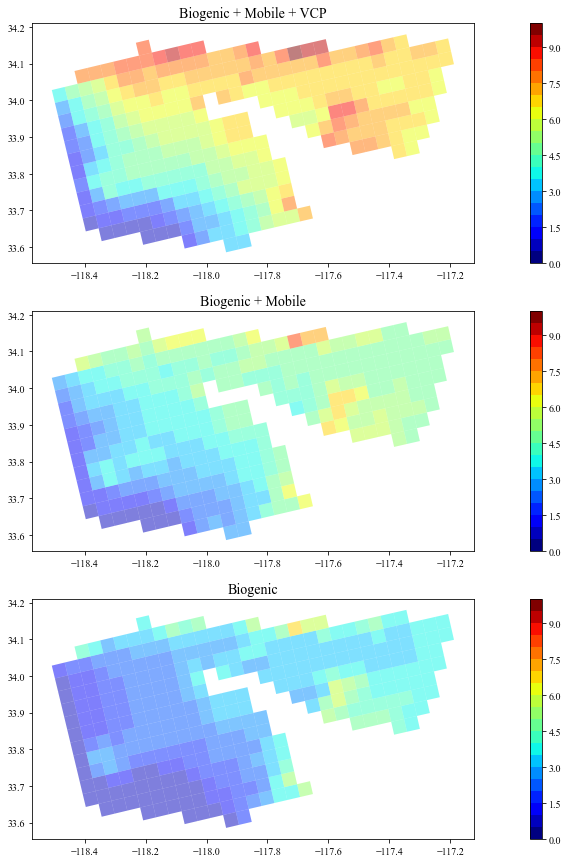

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(20, 15))


vmax = 10
vmin = 0
nlevels = 21
clevel = np.linspace(vmin,vmax,nlevels)
cmap = mpl.cm.get_cmap('jet',nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)

gdfs[1].plot(ax=ax1, column = 'o3', cmap = cmap,
#gdfs[2].plot(ax=ax1, column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 1}, 
            markersize = 10, norm=norm,alpha=0.5)
#cx.add_basemap(ax1, crs=gdf.crs, source=cx.providers.Stamen.TonerLite)
ax1.set_title('Biogenic + Mobile + VCP',fontsize=14)

gdfs[2].plot(ax=ax2, column = 'o3', cmap = cmap,
#gdfs[2].plot(ax=ax1, column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 1}, 
            markersize = 10, norm=norm,alpha=0.5)
#cx.add_basemap(ax2, crs=gdf.crs, source=cx.providers.Stamen.TonerLite)
ax2.set_title('Biogenic + Mobile',fontsize=14)

gdfs[0].plot(ax=ax3, column = 'o3', cmap = cmap,
#gdfs[2].plot(ax=ax1, column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 1}, 
            markersize = 10, norm=norm,alpha=0.5)
#cx.add_basemap(ax3, crs=gdf.crs, source=cx.providers.Stamen.TonerLite)
ax3.set_title('Biogenic',fontsize=14)

Text(0.5, 1.0, 'VOC$_r$ contribution from mobile sources')

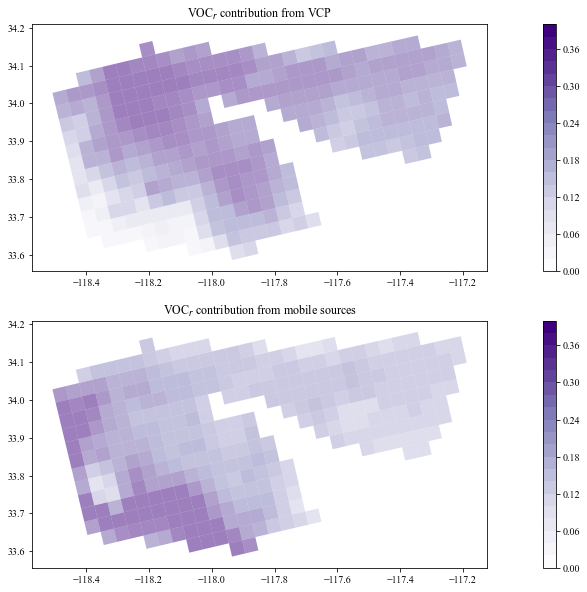

In [19]:
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(20, 10))


vmax = 0.4
vmin = 0
nlevels = 21
clevel = np.linspace(vmin,vmax,nlevels)
cmap = mpl.cm.get_cmap("Purples",nlevels-1) 
norm = mpl.colors.BoundaryNorm(clevel, ncolors=cmap.N, clip=False)


vcp_ratio.plot(ax=ax1, column = 'o3', cmap = cmap,
#gdfs[2].plot(ax=ax1, column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 1}, 
            markersize = 10, norm=norm,alpha=0.5)
#cx.add_basemap(ax1, crs=gdf.crs, source=cx.providers.Stamen.TonerLite)
ax1.set_title('VOC$_r$ contribution from VCP')

mobile_ratio.plot(ax=ax2, column = 'o3', cmap = cmap,
#gdfs[2].plot(ax=ax1, column = 'o3', cmap = cmap,
            legend = True, legend_kwds={'shrink': 1}, 
            markersize = 10, norm=norm,alpha=0.5)
#cx.add_basemap(ax2, crs=gdf.crs, source=cx.providers.Stamen.TonerLite)
ax2.set_title('VOC$_r$ contribution from mobile sources')

0.2888872876116151
0.2264434013167989


/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/2897407863.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()


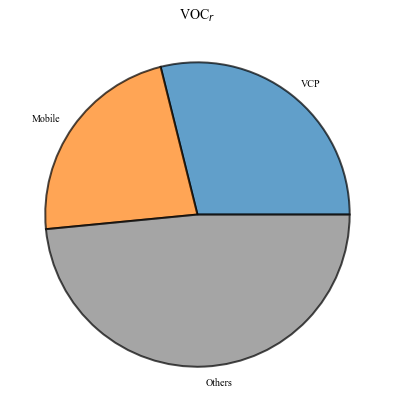

In [20]:
#totol region
o3_mean = pd.Series()

o3_mean['VCP'] =   gdfs[1]['o3'].mean() - gdfs[2]['o3'] .mean()
o3_mean['Mobile'] =  gdfs[2]['o3'].mean() - gdfs[0]['o3'] .mean()
o3_mean['Others'] = gdfs[0]['o3'].mean()
print(o3_mean['VCP']/o3_mean.sum())
print(o3_mean['Mobile']/o3_mean.sum())

plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Times New Roman"

wedges, texts=  plt.pie(x=o3_mean.values,labels=o3_mean.index,wedgeprops={"edgecolor":"k",'alpha':0.7},
                    colors=['tab:blue','tab:orange','tab:gray'])
plt.title('VOC$_r$',fontsize=14)

#p = vocr_lump.plot.pie(cmap='rainbow',fontsize=14,wedgeprops={"edgecolor":"k",'alpha':0.7},colors= colors)
plt.ylabel('')
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('k')
    pie_wedge.set_linewidth(2)

/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()
/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()
/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()
/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype 

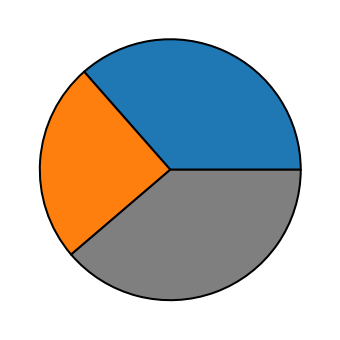

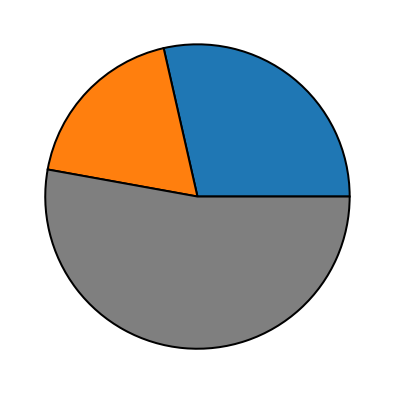

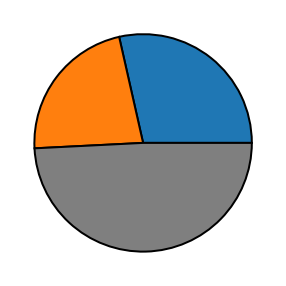

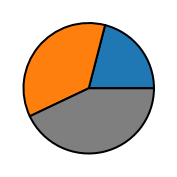

In [21]:
#separate region
for i in range(4):
    indx = gdfs[1]['cls_indxs'] == i
    o3_mean = pd.Series()
    o3_mean['VCP'] =   gdfs[1].loc[indx,'o3'].mean() - gdfs[2].loc[indx,'o3'] .mean()
    o3_mean['Mobile'] =  gdfs[2].loc[indx,'o3'].mean() - gdfs[0].loc[indx,'o3'] .mean()
    o3_mean['Others'] = gdfs[0].loc[indx,'o3'].mean()
    piesize= np.round(o3_mean.sum())
    plt.figure(figsize=(piesize,piesize))
    plt.rcParams["font.family"] = "Times New Roman"
#,labels=o3_mean.index
    wedges, texts=  plt.pie(x=o3_mean.values,wedgeprops={"edgecolor":"k",'alpha':1},
                        colors=['tab:blue','tab:orange','tab:gray'])
   # plt.title('VOC$_r$ in {}'.format(shapefile['MERGE_SRC'].values[i]),fontsize=14)

    #p = vocr_lump.plot.pie(cmap='rainbow',fontsize=14,wedgeprops={"edgecolor":"k",'alpha':0.7},colors= colors)
    plt.ylabel('')
    for pie_wedge in wedges:
        pie_wedge.set_edgecolor('k')
        pie_wedge.set_linewidth(2)
    #plt.legend(o3_mean.index, bbox_to_anchor = (0.1, .3),fontsize=20)

In [22]:
#calibrated VOCr
cal_vocs = ['ch4','moh','eoh','acd','act','iso','macr','mvk','api','lim','eclp','ben','tol',
          'bald','xyl','d5silx','pcbtf']
cal_indx = []
for cal_voc in cal_vocs:
    cal_indx.append(fns.index(cal_voc))

In [23]:
xlim =  [-118.4,-117.1]
ylim = [33.5,34.2] 

gdfs = []
for vocr_comb in vocr_combs:
    o3 = np.nansum(np.nanmean(vocr_comb[:,:,cal_indx,:],3),2)
    df_wrf = pd.DataFrame(data={'lon':lon.flatten(), 'lat':lat.flatten(),'o3':o3.flatten(),'cls_indxs':cls_indxs.flatten(),
                           'clon1':clon1.flatten(), 'clon2':clon2.flatten(),'clon3':clon3.flatten(),'clon4':clon4.flatten(),
                           'clat1':clat1.flatten(), 'clat2':clat2.flatten(),'clat3':clat3.flatten(),'clat4':clat4.flatten()})
    #indx = (df_wrf['lon'] >= xlim[0]) & (df_wrf['lon'] <= xlim[1]) & (df_wrf['lat'] >= ylim[0]) & (df_wrf['lat'] <= ylim[1])
    indx = area_indx == 1
    df_wrf = df_wrf.loc[indx,:]
    geometry_polygon = [Polygon([[df_wrf.loc[i,'clon1'], df_wrf.loc[i,'clat1']],
            [df_wrf.loc[i,'clon2'], df_wrf.loc[i,'clat2']],
            [df_wrf.loc[i,'clon3'], df_wrf.loc[i,'clat3']],
            [df_wrf.loc[i,'clon4'], df_wrf.loc[i,'clat4']]]) for i in df_wrf.index]
    gdf = gpd.GeoDataFrame(df_wrf, geometry=geometry_polygon)
    gdf.loc[:,'index'] = range(gdf.shape[0])
    #gdf = gdf.groupby(['clon1','clon2','clon3','clon4','clat1','clat2','clat3','clat4']).agg('mean').reset_index()
    gdf = gdf.set_crs('epsg:4326',allow_override=True)
    gdfs.append(gdf)

In [24]:
vcp_diff = gdfs[1].copy(deep=True)
vcp_diff['o3'] = gdfs[1]['o3'] - gdfs[2]['o3'] 
vcp_ratio = gdfs[1].copy(deep=True)
vcp_ratio['o3'] = vcp_diff['o3']/gdfs[1]['o3'] 
mobile_diff = gdfs[1].copy(deep=True)
mobile_diff['o3'] = gdfs[2]['o3'] - gdfs[0]['o3'] 
mobile_ratio = gdfs[1].copy(deep=True)
mobile_ratio['o3'] = mobile_diff['o3']/gdfs[1]['o3'] 
anthro_ratio = gdfs[1].copy(deep=True)
anthro_ratio['o3'] = 1-gdfs[0]['o3']/gdfs[1]['o3'] 

In [25]:
print(np.nanmean(vcp_diff['o3']))
print(np.nanmean(mobile_diff['o3']))

0.5799788630693387
0.3054526377358473


0.21635316293319173
0.11394491852806823


/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/2897407863.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()


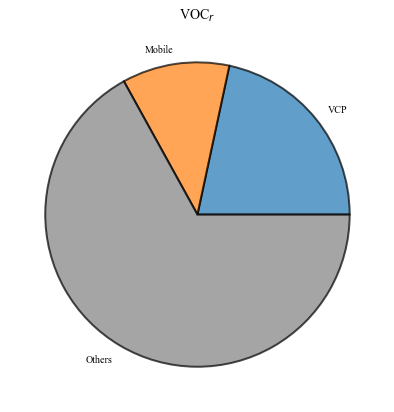

In [26]:
#totol region
o3_mean = pd.Series()

o3_mean['VCP'] =   gdfs[1]['o3'].mean() - gdfs[2]['o3'] .mean()
o3_mean['Mobile'] =  gdfs[2]['o3'].mean() - gdfs[0]['o3'] .mean()
o3_mean['Others'] = gdfs[0]['o3'].mean()
print(o3_mean['VCP']/o3_mean.sum())
print(o3_mean['Mobile']/o3_mean.sum())

plt.figure(figsize=(7,7))
plt.rcParams["font.family"] = "Times New Roman"

wedges, texts=  plt.pie(x=o3_mean.values,labels=o3_mean.index,wedgeprops={"edgecolor":"k",'alpha':0.7},
                    colors=['tab:blue','tab:orange','tab:gray'])
plt.title('VOC$_r$',fontsize=14)

#p = vocr_lump.plot.pie(cmap='rainbow',fontsize=14,wedgeprops={"edgecolor":"k",'alpha':0.7},colors= colors)
plt.ylabel('')
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('k')
    pie_wedge.set_linewidth(2)

/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()
/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()
/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  o3_mean = pd.Series()
/var/folders/77/pb109gb144179sms3gzb4cfc0000gn/T/ipykernel_28436/94780140.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype 

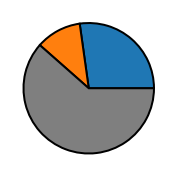

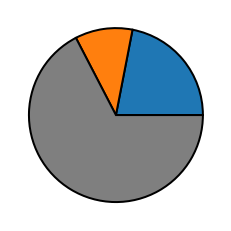

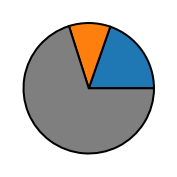

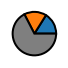

In [27]:
#separate region
for i in range(4):
    indx = gdfs[1]['cls_indxs'] == i
    o3_mean = pd.Series()
    o3_mean['VCP'] =   gdfs[1].loc[indx,'o3'].mean() - gdfs[2].loc[indx,'o3'] .mean()
    o3_mean['Mobile'] =  gdfs[2].loc[indx,'o3'].mean() - gdfs[0].loc[indx,'o3'] .mean()
    o3_mean['Others'] = gdfs[0].loc[indx,'o3'].mean()
    piesize= np.round(o3_mean.sum())
    plt.figure(figsize=(piesize,piesize))
    plt.rcParams["font.family"] = "Times New Roman"
#,labels=o3_mean.index
    wedges, texts=  plt.pie(x=o3_mean.values,wedgeprops={"edgecolor":"k",'alpha':1},
                        colors=['tab:blue','tab:orange','tab:gray'])
   # plt.title('VOC$_r$ in {}'.format(shapefile['MERGE_SRC'].values[i]),fontsize=14)

    #p = vocr_lump.plot.pie(cmap='rainbow',fontsize=14,wedgeprops={"edgecolor":"k",'alpha':0.7},colors= colors)
    plt.ylabel('')
    for pie_wedge in wedges:
        pie_wedge.set_edgecolor('k')
        pie_wedge.set_linewidth(2)
    #plt.legend(o3_mean.index, bbox_to_anchor = (0.1, .3),fontsize=20)